# Dirichlet Distribution

In [1]:
import numpy as np  # import jax.numpy as np  ## jax is numpy on steroid
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

sns.set()

## Two probabilities (p, q) for two categories

Note: p + q = 1

In [2]:
d2 = stats.dirichlet(alpha=(1, 2))

N = 100  # num of samples
ps = d2.rvs(100)
ps[:3]

array([[0.38083052, 0.61916948],
       [0.26852185, 0.73147815],
       [0.627747  , 0.372253  ]])

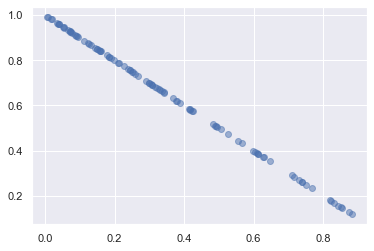

In [3]:
plt.scatter(ps[:,0], ps[:,1], alpha=.5)

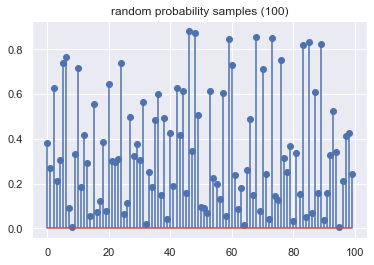

In [4]:
plt.stem(ps[:,0]);
plt.title(f'random probability samples ({N})');

In [5]:
ps.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Three dimensional

In [6]:
d31 = stats.dirichlet(alpha=(1,1,1))  # uniform over the 

In [7]:
ps = d31.rvs(N)
ps[:2]

array([[0.32096743, 0.37185653, 0.30717604],
       [0.6503586 , 0.28390109, 0.06574032]])

In [8]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://blog.finxter.com/matplotlib-3d-plot/

def plot_density3(ps):
    fig, axes = plt.subplots(1,2, figsize=(12,5), subplot_kw=dict(projection='3d'))

    ax = axes[0] 
    ax.scatter3D(ps[:,0], ps[:,1], ps[:,2], alpha=.4);
    ax.set_xlabel('X axis')
    ax.set_zlabel('Z');

    ax = axes[1] 
    ax.plot([1,0], [0,1], [0,0], color='k', alpha=.1)  # triangle x+y+z = 1, x,y,z>=0
    ax.plot([1,0], [0,0], [0,1], color='k', alpha=.1)
    ax.plot([0,0], [1,0], [0,1], color='k', alpha=.1)
    
    ax.set_proj_type('persp')
    ax.scatter3D(ps[:,0], ps[:,1], ps[:,2], alpha=.4, s=5);
    ax.view_init(elev=40, azim=20)
    ax.set_xlabel('X axis')
    ax.set_zlabel('Z');



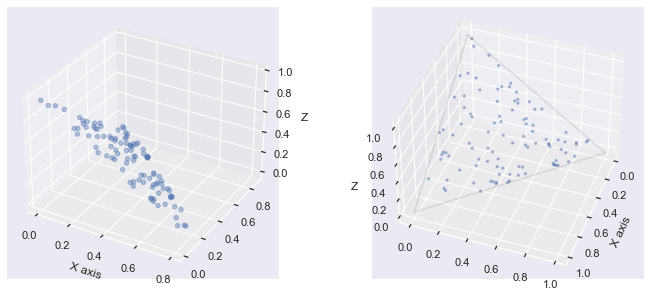

In [9]:
plot_density3(ps)

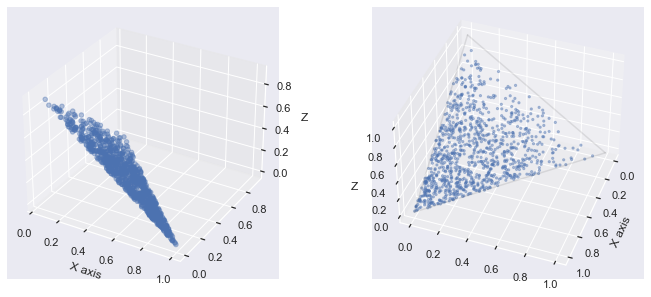

In [10]:
plot_density3(stats.dirichlet(alpha=(2,1,1)).rvs(1000))

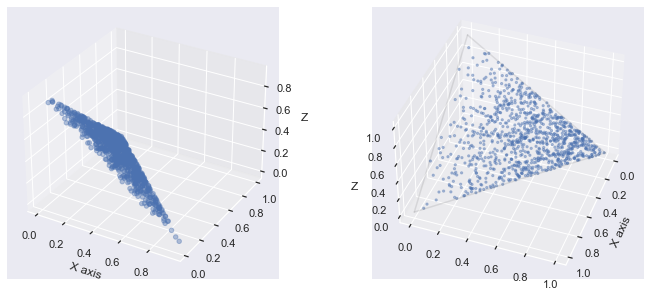

In [11]:
plot_density3(stats.dirichlet(alpha=(1,2,1)).rvs(1000))

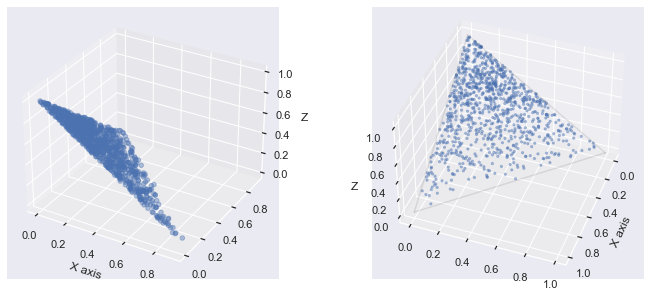

In [12]:
plot_density3(stats.dirichlet(alpha=(1,1,2)).rvs(1000))

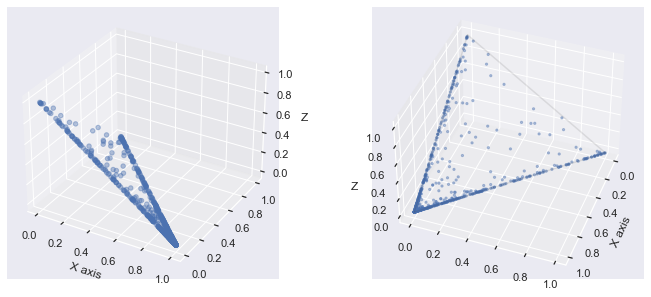

In [13]:
plot_density3(stats.dirichlet(alpha=(.9,.1,.1)).rvs(1000))

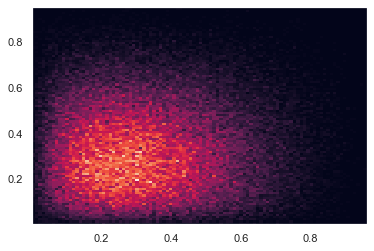

In [54]:
ps = stats.dirichlet(alpha=(2,2,2)).rvs(100000)
plt.hist2d(x=ps[:,0], y=ps[::-1,1], bins=100);

In [55]:
import pandas as pd
df = pd.DataFrame({'x': ps[:,0], 'y': ps[:,1], 'z': ps[:,2]})
print(df.head())

          x         y         z
0  0.394489  0.210460  0.395051
1  0.441548  0.069708  0.488744
2  0.318002  0.363271  0.318728
3  0.523726  0.049391  0.426884
4  0.139170  0.685853  0.174977


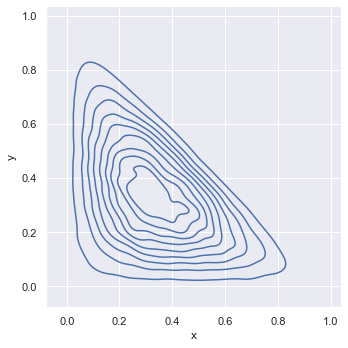

In [56]:
# warning: slow for large N
sns.displot(df, x='x', y='y', kind='kde')

In [57]:
sns.__version__

'0.11.0'

In [58]:
shape=(2,3)
a = np.ones(shape)
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [59]:
a[1] *= 2
a

array([[1., 1., 1.],
       [2., 2., 2.]])